In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D

In [ ]:
(train_images,train_labels),(test_images,test_labels) = datasets.fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


In [ ]:
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


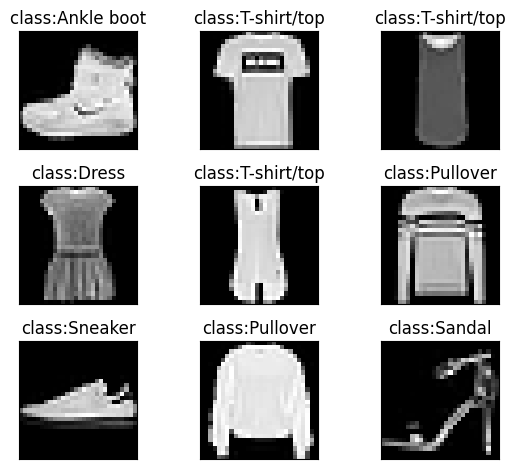

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title("class:{}".format(class_names[train_labels[i]]))
  plt.xticks([])
  plt.yticks([])
fig
plt.tight_layout()  # Call this after creating all subplots
plt.show()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.7441 - loss: 0.7156 - val_accuracy: 0.8674 - val_loss: 0.3688
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.8744 - loss: 0.3404 - val_accuracy: 0.8889 - val_loss: 0.3144
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.8942 - loss: 0.2867 - val_accuracy: 0.8957 - val_loss: 0.2864
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9084 - loss: 0.2474 - val_accuracy: 0.9014 - val_loss: 0.2677
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9186 - loss: 0.2249 - val_accuracy: 0.9035 - val_loss: 0.2673


In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f'test accuracy : {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8965 - loss: 0.2916
test accuracy : 0.8978999853134155


In [ ]:
test_loss,test_acc = model.evaluate(train_images,train_labels)
print(f'train accuracy : {test_acc}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1018 - loss: 2.3028
train accuracy : 0.10010000318288803


In [ ]:
import numpy as np

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [ ]:
predictions

array([[0.09669898, 0.10878402, 0.10309073, ..., 0.10081701, 0.0962639 ,
        0.0972159 ],
       [0.09302802, 0.11726207, 0.10592634, ..., 0.09932274, 0.09411106,
        0.09687801],
       [0.10092547, 0.11383484, 0.10724551, ..., 0.10047638, 0.09044167,
        0.09858618],
       ...,
       [0.09965751, 0.11155225, 0.10549075, ..., 0.1027291 , 0.09424513,
        0.09631258],
       [0.09624906, 0.11134782, 0.10752779, ..., 0.10260951, 0.09173881,
        0.10075336],
       [0.09690569, 0.10763179, 0.10376193, ..., 0.10123385, 0.09510041,
        0.09915049]], dtype=float32)

In [ ]:
np.argmax(predictions[0])

1

In [ ]:
def predict_image(image):
  pred_label = np.argmax(predictions[image])
  true_label = test_labels[image]
  plt.figure()
  plt.imshow(test_images[image].reshape(28,28),cmap=plt.cm.binary)
  plt.title(f"Predicted: {pred_label} ,True Label: {true_label}")
  plt.axis("off")
  plt.show()

In [ ]:
predictions = model.predict(test_images)

NameError: name 'model' is not defined

In [ ]:
predict_image(2)

NameError: name 'predict_image' is not defined